In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importo datos

In [2]:
datos = pd.read_csv('./datos.csv')

### Gráfico con barras de error en y

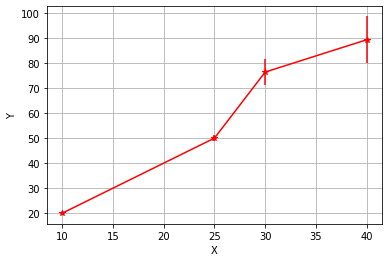

In [3]:
plt.errorbar(datos.X, datos.Y, yerr=datos.errY,fmt='*r-')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Ajuste de cuadrados mínimos a función lineal con numpy

In [4]:
ajuste= np.polyfit(datos.X,datos.Y,deg=1)
ajuste_func = np.poly1d(ajuste)
pendiente = ajuste[0]
ordenada= ajuste[1]
pendiente, ordenada

(2.404, -4.1799999999999855)

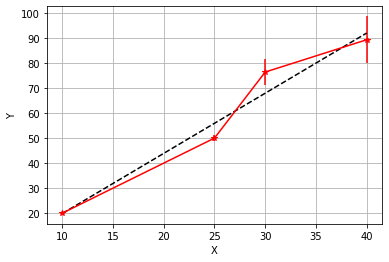

In [5]:
plt.errorbar(datos.X, datos.Y, yerr=datos.errY,fmt='*r-')
plt.plot(datos.X, ajuste_func(datos.X), '--k')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Error del ajuste
Si le pedimos que entregue una matriz de covarianza, en la diagonal de esta estarán las varianzas de los coeficientes de ajuste. Calculando la raíz de estas se obtiene su desvío estándar.

In [6]:
ajuste, V= np.polyfit(datos.X,datos.Y,deg=1, cov=True)
ajuste_func = np.poly1d(ajuste)
pendiente = ajuste[0]
ordenada= ajuste[1]
err_pendiente = np.sqrt(V[0,0])
err_ordenada = np.sqrt(V[1,1])
pendiente, ordenada, err_pendiente, err_ordenada

(2.404, -4.1799999999999855, 0.3484365078461215, 9.89369496194421)

## Ajuste pesado por el error
Si los errores son Gaussianos, se puede asignar un **peso** a cada punto que será $w= 1/\sigma$

In [7]:
pesos= 1./datos.errY
datos.errY, pesos

(0    0.30
 1    1.33
 2    5.33
 3    9.40
 Name: errY, dtype: float64, 0    3.333333
 1    0.751880
 2    0.187617
 3    0.106383
 Name: errY, dtype: float64)

In [8]:
ajuste, V= np.polyfit(datos.X,datos.Y,deg=1, w=pesos, cov=True)
ajuste_func = np.poly1d(ajuste)
pendiente = ajuste[0]
ordenada= ajuste[1]
err_pendiente = np.sqrt(V[0,0])
err_ordenada = np.sqrt(V[1,1])
pendiente, ordenada, err_pendiente, err_ordenada

(2.0984418688919195,
 -1.0061677612351363,
 0.17707943507351454,
 2.012542159819914)

Se vé que variaron los coeficientes ajustados.

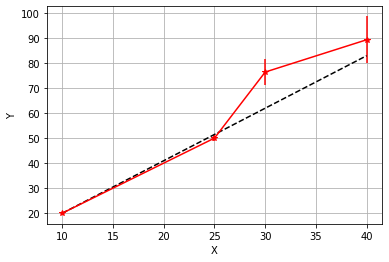

In [9]:
plt.errorbar(datos.X, datos.Y, yerr=datos.errY,fmt='*r-')
plt.plot(datos.X, ajuste_func(datos.X), '--k')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('ajuste.png')
plt.show()